In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [10]:
image=Image.open("/kaggle/input/blood-cancer-image-dataset/Blood_Cancer/Sample_1.tiff")

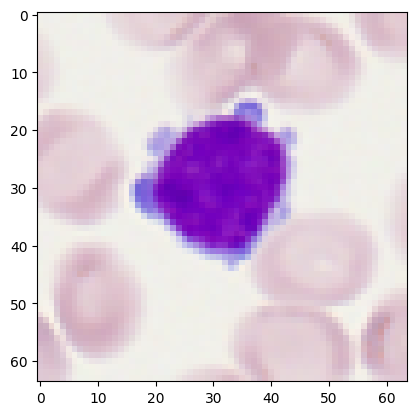

In [11]:
plt.imshow(image)
plt.show()

In [12]:
df="/kaggle/input/blood-cancer-image-dataset/Blood_Cancer"
new_df=[]
for file in os.listdir(df):
    data=os.path.join(df,file)
    if os.path.isfile(data):
        cv=cv2.imread(data)
    # cv_resize=cv2.resize(cv,()
        new_df.append(cv)
new_df=np.array(new_df)

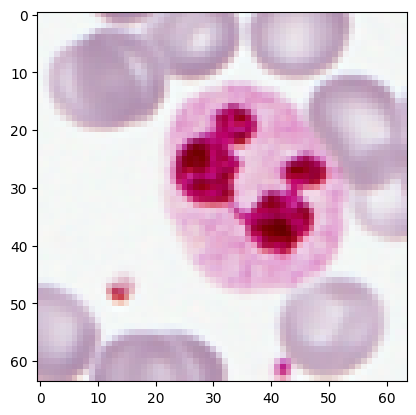

In [13]:
plt.imshow(new_df[0])
plt.show()

In [14]:
new_df.shape

(10000, 64, 64, 3)

####  AutoEncoder

In [32]:
from keras.layers import Layer,Dense,BatchNormalization,Flatten,Dropout,Input,Conv2D,MaxPooling2D,LeakyReLU,Conv2DTranspose
from keras.initializers import HeNormal,GlorotUniform

from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.models import Model,Sequential


In [42]:
inputs=Input(shape=(64,64,3))
e=Conv2D(32,(3,3),activation="relu",kernel_initializer=GlorotUniform(),kernel_regularizer=l2(0.01),padding="same")(inputs)
e=Conv2D(64,(3,3),kernel_initializer=GlorotUniform(),kernel_regularizer=l2(0.01),padding="same")(e)
e=LeakyReLU(0.08)(e)
e=MaxPooling2D(pool_size=(2,2),strides=(2,2))(e)


e=Conv2D(128,(3,3),kernel_initializer=GlorotUniform(),kernel_regularizer=l2(0.01),padding='same')(e)
e=LeakyReLU(0.08)(e)
e=Conv2D(256,(3,3),kernel_initializer=GlorotUniform(),kernel_regularizer=l2(0.01),padding="same")(e)
e=LeakyReLU(0.08)(e)
e=MaxPooling2D(pool_size=(2,2),strides=(2,2))(e)

e=Conv2D(556,(3,3),kernel_initializer=GlorotUniform(),kernel_regularizer=l2(0.01),padding="same")(e)
# e=MaxPooling2D(2,2)(e)

e=Conv2DTranspose(256,(3,3),activation="relu",kernel_initializer=GlorotUniform(),kernel_regularizer=l2(0.01),padding="same")(e)
e=LeakyReLU(0.08)(e)

e=Conv2DTranspose(128,(3,3),strides=(2,2),kernel_initializer=GlorotUniform(),kernel_regularizer=l2(0.01),padding="same")(e)
e=LeakyReLU(0.08)(e)


e=Conv2DTranspose(64,(3,3),kernel_initializer=GlorotUniform(),kernel_regularizer=l2(0.01),padding='same')(e)
e=LeakyReLU(0.08)(e)
e=Conv2DTranspose(32,(3,3),strides=(2,2),kernel_initializer=GlorotUniform(),kernel_regularizer=l2(0.01),padding="same")(e)

outputs=Conv2D(1,(3,3),padding="same")(e)
model=Model(inputs,outputs)
model.compile(optimizer="adam",loss="mse",metrics=["mae"])
model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_63 (LeakyReLU)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_64 (LeakyReLU)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_65 (LeakyReLU)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 16, 16, 556)    │     1,281,580 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_33             │ (None, 16, 16, 256)    │     1,281,280 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_66 (LeakyReLU)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_34             │ (None, 32, 32, 128)    │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_67 (LeakyReLU)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_35             │ (None, 32, 32, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_68 (LeakyReLU)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_36             │ (None, 64, 64, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 64, 64, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,338,861 (12.74 MB)

 Trainable params: 3,338,861 (12.74 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.fit(new_df,new_df,batch_size=32,epochs=15,validation_split=0.2)

Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 642s 3s/step - loss: 34191.4727 - mae: 81.3423 - val_loss: 794.8141 - val_mae: 18.1664
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 599s 2s/step - loss: 786.3521 - mae: 18.6529 - val_loss: 653.5933 - val_mae: 16.1570
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 634s 3s/step - loss: 647.9748 - mae: 15.9463 - val_loss: 610.0533 - val_mae: 15.1170
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 596s 2s/step - loss: 629.4838 - mae: 15.8071 - val_loss: 576.6414 - val_mae: 14.2284
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 597s 2s/step - loss: 604.1334 - mae: 15.2667 - val_loss: 557.4833 - val_mae: 13.8661
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 595s 2s/step - loss: 579.9427 - mae: 14.8991 - val_loss: 541.5173 - val_mae: 13.7766
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 596s 2s/step - loss: 562.2491 - mae: 14.5073 - val_loss: 585.8865 - val_mae: 15.1556
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 595s 2s/step - loss: 548.0877 - mae: 14.1749 - val_loss: 599.3382 - val_mae: 16.502

# ##  Quantum Deep Learning# 

In [1]:
!pip install cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 33.8 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.7 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 56.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4

In [2]:
import cirq
import tensorflow as tf
from keras.layers import Layer,Dense,Flatten,BatchNormalization,Input
from keras.models import Model,Sequential
from keras.initializers import HeNormal,GlorotUniform
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

In [ ]:
def quantum_circuit(data):
    img=data/255
    qubit=[cirq.GridQubit(i,j) for i in range(5) for j in range(5)]
    circuit=cirq.Circuit()
    for k,value in enumerate(img):
        q= qubits[i * 5 + j]  
        circuit.append(cirq.H(qubit[q]))
        for k in range(5):
            for j in range(5):
                circuit.append(cirq.rx(img[k,j]).on(qubit))
                circuit.append(cirq.measure(qubit[q],key=f"qubit_{i}"))
    return circuit,qubit
def run_quantum_circuit(data):
    # img=data/255.0
    simulator=cirq.Simulator()
    circuit,qubit=quantum_circuit(data)
    result=simulator.simulate(circuit)
    state_vector=result.final_state_vector
    processed_vect=np.abs(state_vector)
    results.append(processed_vect)
    return np.array(results,dtype=np.float32)
class QuantumLayer(Layer):
    def __init__(self):
        super(QuantumLayer,self).__init__()
    def call(self,inputs):
        output=tf.numpy_function(run_quantum_circuit,[inputs],tf.float32)
        output.set_shape(inputs.shape)
        return output
model=Sequential([
    QuantumLayer(),
    Flatten(),
    Dense(1,activation="sigmoid")
])
model.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")
model.fit(new_df,new_df)

In [ ]:
import cirq
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Layer, Flatten, Dense
from tensorflow.keras.models import Sequential

# Function to build the quantum circuit
def quantum_circuit(data):
    # Normalize the image data to the range [0, 1]
    img = data / 255.0

    # Create a 5x5 grid of qubits
    qubits = [cirq.GridQubit(i, j) for i in range(5) for j in range(5)]
    circuit = cirq.Circuit()

    # Build the quantum circuit by mapping image data to qubits
    for i in range(5):
        for j in range(5):
            qubit = qubits[i * 5 + j]  # Map pixel (i, j) to the corresponding qubit

            # Apply a Hadamard gate
            circuit.append(cirq.H(qubit))

            # Apply an Rx gate based on pixel intensity
            circuit.append(cirq.rx(img[i, j] * np.pi).on(qubit))

            # Measure the qubit
            circuit.append(cirq.measure(qubit, key=f"qubit_{i}_{j}"))

    return circuit, qubits

# Function to simulate the quantum circuit and process the results
def run_quantum_circuit(data):
    # Ensure input data is normalized
    data = data / 255.0

    # Prepare the simulator
    simulator = cirq.Simulator()

    # Initialize a list to store processed results
    results = []

    # Loop over each input data instance
    for img in data:
        circuit, qubits = quantum_circuit(img)

        # Simulate the circuit
        result = simulator.simulate(circuit)

        # Get the state vector and process it
        state_vector = result.final_state_vector
        processed_vect = np.abs(state_vector)

        # Append the processed vector to results
        results.append(processed_vect)

    return np.array(results, dtype=np.float32)

# Define a custom TensorFlow layer for the quantum circuit
class QuantumLayer(Layer):
    def __init__(self):
        super(QuantumLayer, self).__init__()

    def call(self, inputs):
        # Use tf.numpy_function to run the quantum circuit simulation
        output = tf.numpy_function(run_quantum_circuit, [inputs], tf.float32)

        # Set the shape of the output to match the input shape
        output.set_shape(inputs.shape)
        return output

# Build the Keras model with the quantum layer
model = Sequential([
    QuantumLayer(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Dummy dataset for testing
# Assume `new_df` is a dataset with images of shape (N, 5, 5) where N is the number of samples
new_df = np.random.randint(0, 256, (100, 5, 5))  # Example dataset
labels = np.random.randint(0, 2, (100,))        # Binary labels

# Fit the model on the dataset
model.fit(new_df, labels, epochs=10, batch_size=10)
